In [1]:
import pandas as pd 
from sklearn.feature_selection import RFECV
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
import warnings
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
warnings.filterwarnings("ignore")
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import anderson
from sklearn.model_selection import train_test_split
from scipy.stats import mannwhitneyu
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
from imblearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D


In [59]:
import keras
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, SpatialDropout1D, LSTM, BatchNormalization
from keras.layers.wrappers import Bidirectional # new! 
from keras.callbacks import ModelCheckpoint 
import os
from sklearn.metrics import roc_auc_score 
import matplotlib.pyplot as plt 
%matplotlib inline

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [3]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Tue Mar 24 16:27:42 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [5]:
data = pd.read_csv('/gdrive/My Drive/ensembel/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [98]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [0]:
X = data[['V27', 'V4', 'V10', 'V14', 'V28', 'V20', 'V21', 'V16', 'V13', 'V24']]
y = data['Class']

In [8]:
X.head()

,V27,V4,V10,V14,V28,V20,V21,V16,V13,V24
0,0.133558,1.378155,0.090794,-0.311169,-0.021053,0.251412,-0.018307,-0.470401,-0.991390,0.066928
1,-0.008983,0.448154,-0.166974,-0.143772,0.014724,-0.069083,-0.225775,0.463917,0.489095,-0.339846
2,-0.055353,0.379780,0.207643,-0.165946,-0.059752,0.524980,0.247998,-2.890083,0.717293,-0.689281
3,0.062723,-0.863291,-0.054952,-0.287924,0.061458,-0.208038,-0.108300,-1.059647,0.507757,-1.175575
4,0.219422,0.403034,0.753074,-1.119670,0.215153,0.408542,-0.009431,-0.451449,1.345852,0.141267


In [0]:
X= data[['V27', 'V4', 'V10', 'V14', 'V28', 'V20', 'V21', 'V16', 'V13', 'V24']]
X = X.loc[:,:].apply(lambda x: round(x,2))
mm_scaler = preprocessing.StandardScaler()
X.columns
X[['V27', 'V4', 'V10', 'V14', 'V28', 'V20', 'V21', 'V16', 'V13', 'V24']] = mm_scaler.fit_transform(X[['V27', 'V4', 'V10', 'V14', 'V28', 'V20', 'V21', 'V16', 'V13', 'V24']])


In [10]:
X.head()

,V27,V4,V10,V14,V28,V20,V21,V16,V13,V24
0,0.322064,0.974668,0.082659,-0.323391,-0.060580,0.324273,-0.027232,-0.536365,-0.994706,0.115571
1,-0.024772,0.317827,-0.156125,-0.146050,0.030300,-0.090809,-0.313132,0.524966,0.492316,-0.561385
2,-0.148642,0.268388,0.192867,-0.177345,-0.181754,0.674499,0.340354,-3.298108,0.723408,-1.139274
3,0.148646,-0.607399,-0.045917,-0.302528,0.181767,-0.272408,-0.149761,-1.209683,0.512411,-1.948319
4,0.545031,0.282513,0.688803,-1.168370,0.666463,0.531815,-0.013618,-0.513541,1.356397,0.231149


In [0]:
def logist_regression(X_sampling, y_sampling, sampling_type,XR_test, yR_test):
   
   #### logistic regression part and grid search 
   lr7 = LogisticRegression()
   penalty = ['l1', 'l2']
   C = [0.001,0.01,0.1,1,10,100]
   hyperparameters = dict(C=C, penalty=penalty)
   gridsearch = GridSearchCV(lr7, hyperparameters, cv=3, verbose=1)
   best_model_gs = gridsearch.fit(X_sampling, y_sampling)
   predictions7 = best_model_gs.predict(XR_test)

   #### printing the right metrics
   print(metrics.classification_report(yR_test,predictions7))
   print(metrics.confusion_matrix(yR_test,predictions7))
    
    
   #### plotting the sampling distribution
   datafra = pd.DataFrame(data=y_sampling, index=range(len(y_sampling)), columns=['Class'])
   datafra.Class.value_counts().index 
   #fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=False, sharey=False,figsize=[12,12])
   fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, sharex=False, sharey=False,figsize=[12,4])
   sns.barplot(x=datafra.Class.value_counts().index, y=datafra.Class.value_counts(), data=datafra, ax = ax1)
   
   ####plotting the heatmap for confusion matrix
   metric = metrics.confusion_matrix(yR_test,predictions7)
   confusion_dataframe = pd.DataFrame(data=metric, index=['Actual_Positive','Actual_Negative'], columns=['Guessed_Positive', 'Guessed_Negative'])
   #confusion_dataframe
   sns.heatmap(confusion_dataframe, annot=True, fmt="d", cmap="YlGnBu", ax = ax2)
   
    
   #### plotting the ROC and AUC curve
   fpr, tpr, _ = (metrics.roc_curve(yR_test,predictions7))
   ax3.plot(fpr, tpr)
   roc_auc = auc(fpr, tpr)
   ax3.plot([0, 1], [0, 1], 'k--', label='AUC = %0.3f'% roc_auc)
   ax3.legend(loc='lower right')
   ax3.plot([0,1],[0,1],'r--')
   ax3.set_xlim([-0.1,1.0])
   ax3.set_ylim([-0.1,1.01])
   ax3.set_ylabel('True Positive Rate')
   ax3.set_xlabel('False Positive Rate')
   plt.tight_layout()
   plt.show()
   print(f'Area Under the Curve: {round(roc_auc,2)}')

In [0]:
XN_train, XN_test, yN_train, yN_test = train_test_split(X, y, test_size=0.33, random_state=42)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.1s finished


              precision    recall  f1-score   support

           0       1.00      0.99      1.00     93838
           1       0.14      0.89      0.25       149

    accuracy                           0.99     93987
   macro avg       0.57      0.94      0.62     93987
weighted avg       1.00      0.99      0.99     93987

[[93051   787]
 [   16   133]]


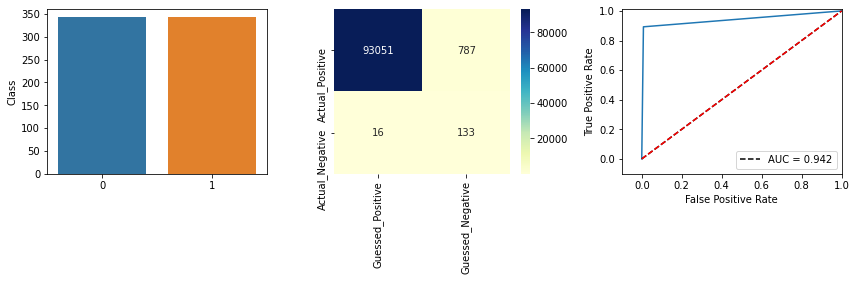

Area Under the Curve: 0.94


In [13]:
rus = RandomUnderSampler(random_state=0)
rus.fit(XN_train, yN_train)
X_smn, y_smn = rus.fit_resample(XN_train, yN_train)

logist_regression(X_smn, y_smn, "RANDOM UNDER-sampling",XN_test, yN_test)

In [0]:
######EFFECT OF PCA ON MODEL PERFORMANCE

In [0]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal_component_1', 'principal_component_2'])

{'copy': True, 'iterated_power': 'auto', 'n_components': 2, 'random_state': None, 'svd_solver': 'auto', 'tol': 0.0, 'whiten': False}
[[ 1. -0. -0.  0. -0.  0.  0.  0.  0.  0.]
 [-0.  1.  0.  0.  0. -0. -0. -0. -0.  0.]
 [-0.  0.  1.  0.  0. -0. -0. -0. -0.  0.]
 [ 0.  0.  0.  1. -0.  0.  0. -0. -0.  0.]
 [-0.  0.  0. -0.  1. -0. -0. -0. -0. -0.]
 [ 0. -0. -0.  0. -0.  1.  0.  0.  0.  0.]
 [ 0. -0. -0.  0. -0.  0.  1.  0.  0.  0.]
 [ 0. -0. -0. -0. -0.  0.  0.  1.  0. -0.]
 [ 0. -0. -0. -0. -0.  0.  0.  0.  1. -0.]
 [ 0.  0.  0.  0. -0.  0.  0. -0. -0.  1.]]


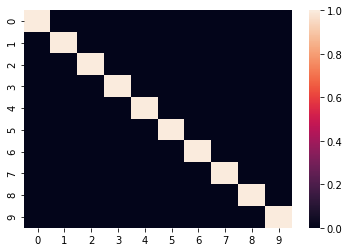

In [37]:
print(pca.get_params())
print(pca.get_covariance().round(4))
sns.heatmap(pca.get_covariance().round(2))

In [38]:
principalComponents.shape

(284807, 2)

In [39]:
principalDf.head()

,principal_component_1,principal_component_2
0,0.125725,-0.479107
1,0.386067,0.531411
2,0.324796,-0.044122
3,0.995606,1.076000
4,0.113791,0.677320


In [0]:
finalDf = pd.concat([principalDf, data['Class']], axis = 1)

In [41]:
finalDf.head()

,principal_component_1,principal_component_2,Class
0,0.125725,-0.479107,0
1,0.386067,0.531411,0
2,0.324796,-0.044122,0
3,0.995606,1.076000,0
4,0.113791,0.677320,0


In [42]:
pca.explained_variance_ratio_

array([0.10000819, 0.10000457])

In [43]:
features = finalDf.columns
features

Index(['principal_component_1', 'principal_component_2', 'Class'], dtype='object')

In [44]:
finalDf.head()

,principal_component_1,principal_component_2,Class
0,0.125725,-0.479107,0
1,0.386067,0.531411,0
2,0.324796,-0.044122,0
3,0.995606,1.076000,0
4,0.113791,0.677320,0


0
0
<class 'str'> <class 'int'>
#ffeb00
   principal_component_1  principal_component_2  Class
0               0.125725              -0.479107      0
1               0.386067               0.531411      0
2               0.324796              -0.044122      0
3               0.995606               1.076000      0
4               0.113791               0.677320      0
1
1
<class 'str'> <class 'int'>
#457c39
      principal_component_1  principal_component_2  Class
541                0.739444               2.272330      1
623                0.299577               1.388307      1
4920               0.696173               0.362007      1
6108               4.406050               1.991300      1
6329               3.698710               5.729770      1


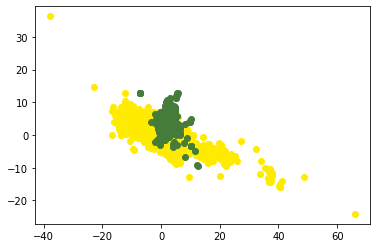

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)
color={'0':'#ffeb00', '1': '#457c39'}
for i,k in enumerate(color.keys()):
  print(i)
  print(k)
  print(type(k), type(i))
  print(color[k])
  finalDf_temp = finalDf[finalDf['Class']==i]
  print(finalDf_temp.head())
  #ax = fig.add_subplot(111, projection='3d')
  ax.scatter(finalDf_temp['principal_component_1'],finalDf_temp['principal_component_2'], c=color[k])
plt.show()


In [0]:
X_pca= finalDf[features].drop('Class',axis=1)
y_pca = finalDf['Class']

XP_train, XP_test, yP_train, yP_test = train_test_split(X_pca, y_pca, test_size=0.33, random_state=42)


686
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.1s finished


              precision    recall  f1-score   support

           0       1.00      0.96      0.98     93838
           1       0.03      0.85      0.06       149

    accuracy                           0.96     93987
   macro avg       0.51      0.90      0.52     93987
weighted avg       1.00      0.96      0.98     93987

[[89633  4205]
 [   22   127]]


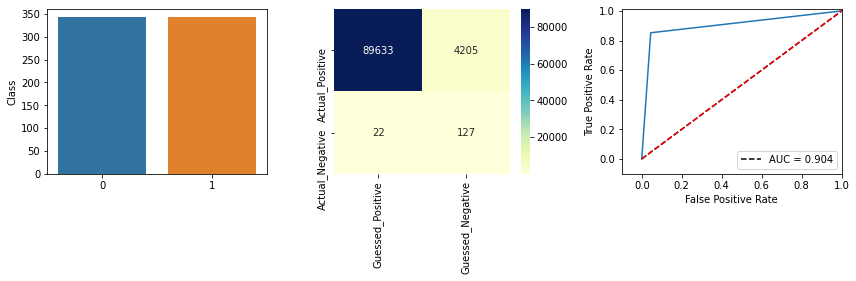

Area Under the Curve: 0.9


In [47]:
rus = RandomUnderSampler(random_state=0)
rus.fit(XP_train, yP_train)
X_pca, y_pca = rus.fit_resample(XP_train, yP_train)
print(len(X_pca))



logist_regression(X_pca, y_pca, "RANDOM UNDER-sampling",XP_test, yP_test)

0
0
<class 'str'> <class 'int'>
#ffeb00
   principal_component_1  principal_component_2  Class
0               0.125725              -0.479107      0
1               0.386067               0.531411      0
2               0.324796              -0.044122      0
3               0.995606               1.076000      0
4               0.113791               0.677320      0
1
1
<class 'str'> <class 'int'>
#457c39
      principal_component_1  principal_component_2  Class
541                0.739444               2.272330      1
623                0.299577               1.388307      1
4920               0.696173               0.362007      1
6108               4.406050               1.991300      1
6329               3.698710               5.729770      1


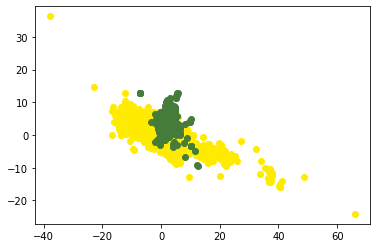

In [48]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
color={'0':'#ffeb00', '1': '#457c39'}
for i,k in enumerate(color.keys()):
  print(i)
  print(k)
  print(type(k), type(i))
  print(color[k])
  finalDf_temp = finalDf[finalDf['Class']==i]
  print(finalDf_temp.head())
  #ax = fig.add_subplot(111, projection='3d')
  ax1.scatter(finalDf_temp['principal_component_1'],finalDf_temp['principal_component_2'], c=color[k])
plt.show()


In [0]:
XN_train, XN_test, yN_train, yN_test = train_test_split(X_smn, y_smn, test_size=0.20, random_state=42)

In [84]:
input_train = XN_train
target_train = yN_train
yN_test= yN_test
XN_test= XN_test
target_train
print(f'Shape of Input Training Data {input_train.shape} ')
print(f'Shape of Target Training Data {target_train.shape} ')

Shape of Input Training Data (548, 10) 
Shape of Target Training Data (548,) 


In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
def ANN(x_train, x_test, y_train, y_test):
  model = Sequential()
  model.add(Dense(256, activation='relu', kernel_initializer='normal', input_shape=(10,)))
  #model.add(Dropout(0.2))
  model.add(Dense(128,kernel_initializer='normal', activation='relu'))
  model.add(Dropout(0.2))
  
  model.add(Dense(128,kernel_initializer='normal', activation='relu'))
  model.add(Dense(64,kernel_initializer='normal', activation='relu'))
  model.add(Dense(32,kernel_initializer='normal', activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(1, activation='sigmoid'))
  
  rms = keras.optimizers.RMSprop(lr=0.001, rho=0.9)
  model.compile(loss='binary_crossentropy', optimizer=rms, metrics=['accuracy'])

  model.summary()
  checkpoint_name = '/gdrive/My Drive/ensembel/Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
  checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose=True,  save_best_only = True, mode ='auto')
  callbacks_list = [checkpoint]


  #early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
  model.fit(x_train, y_train, 
          batch_size=32, epochs=50, verbose=1, 
          validation_data=(x_test, y_test),
          callbacks=callbacks_list)
  
  return model


In [338]:
Model1 = ANN(input_train, XN_test, target_train, yN_test)

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_152 (Dense)            (None, 256)               2816      
_________________________________________________________________
dense_153 (Dense)            (None, 128)               32896     
_________________________________________________________________
dropout_20 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_154 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_155 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_156 (Dense)            (None, 32)                2080      
_________________________________________________________________
batch_normalization_31 (Batc (None, 32)              

In [339]:
np.bincount(yN_train)

array([262, 286])

In [340]:
X

,V27,V4,V10,V14,V28,V20,V21,V16,V13,V24
0,0.322064,0.974668,0.082659,-0.323391,-0.060580,0.324273,-0.027232,-0.536365,-0.994706,0.115571
1,-0.024772,0.317827,-0.156125,-0.146050,0.030300,-0.090809,-0.313132,0.524966,0.492316,-0.561385
2,-0.148642,0.268388,0.192867,-0.177345,-0.181754,0.674499,0.340354,-3.298108,0.723408,-1.139274
3,0.148646,-0.607399,-0.045917,-0.302528,0.181767,-0.272408,-0.149761,-1.209683,0.512411,-1.948319
4,0.545031,0.282513,0.688803,-1.168370,0.666463,0.531815,-0.013618,-0.513541,1.356397,0.231149
...,...,...,...,...,...,...,...,...,...,...
284802,2.328761,-1.461998,4.004229,4.829936,2.484071,1.919747,0.285897,1.266757,-0.693282,-0.842074
284803,0.173420,-0.522646,-0.900030,-0.709369,-0.151461,0.077818,0.285897,-0.810257,1.215733,-1.684141
284804,0.000002,-0.395515,-0.440830,-0.532028,-0.090874,-0.000010,0.313125,0.159777,-0.180863,1.056704
284805,0.272516,0.487335,-0.367358,0.469428,0.302941,0.168617,0.367582,-0.696135,-1.044943,0.198126


In [0]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = Model1.predict_classes(XN_test)

In [342]:
predictions= predictions.reshape(-1,)
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1], dtype=int32)

In [0]:
def model_performance(target, predictions):
  fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, sharex=False, sharey=False,figsize=[16,4])
  ax1.bar(x=target.value_counts().index.astype(str), height=target.value_counts().to_list(), data=target, color=['b','r'])

  metric = metrics.confusion_matrix(target,predictions)
  confusion_dataframe = pd.DataFrame(data=metric, index=['Actual_Negative', 'Actual_Positive'], columns=['Guessed_Negative', 'Guessed_Positive'])
  sns.heatmap(confusion_dataframe, annot=True, fmt="d", cmap="YlGnBu", ax = ax2)

  fpr, tpr, _ = (metrics.roc_curve(target,predictions))
  plt.plot(fpr, tpr)
  

  fpr, tpr, _ = (metrics.roc_curve(target,predictions))
  ax3.plot(fpr, tpr)
  roc_auc = auc(fpr, tpr)
  ax3.plot([0, 1], [0, 1], 'k--', label='AUC = %0.3f'% roc_auc)
  ax3.legend(loc='lower right')
  ax3.plot([0,1],[0,1],'r--')
  ax3.set_xlim([-0.1,1.0])
  ax3.set_ylim([-0.1,1.01])
  ax3.set_ylabel('True Positive Rate')
  ax3.set_xlabel('False Positive Rate')
  plt.tight_layout()
  print(f'Area Under the Curve: {round(roc_auc,2)}')


    
  plt.show()

Area Under the Curve: 0.95


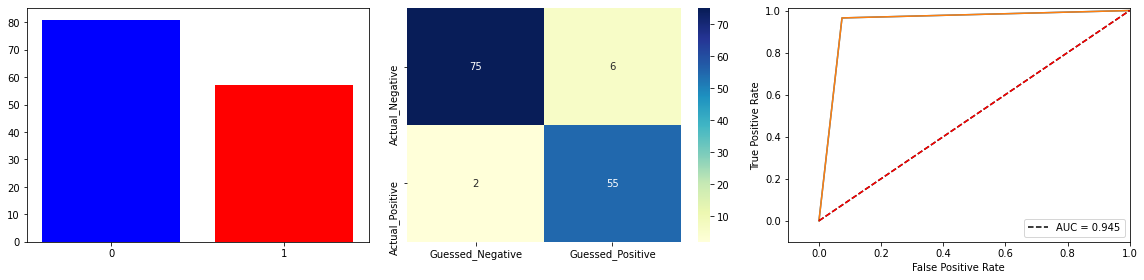

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        81
           1       0.90      0.96      0.93        57

    accuracy                           0.94       138
   macro avg       0.94      0.95      0.94       138
weighted avg       0.94      0.94      0.94       138



In [344]:
model_performance(pd.Series(yN_test), pd.Series(predictions))
print(metrics.classification_report(yN_test,predictions))

In [345]:
new_data = pd.concat([data[X.columns], data['Class']], axis=1)
new_data= new_data[new_data['Class']==1]
x_new_data = new_data.iloc[:,:-1].values
y_new_data = new_data.iloc[:,-1].values
predictions = Model1.predict_classes(x_new_data)
print(predictions.shape)
predictions = predictions.reshape(-1,)
predictions.shape

(492, 1)


(492,)

In [346]:
np.bincount(predictions)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Area Under the Curve: nan


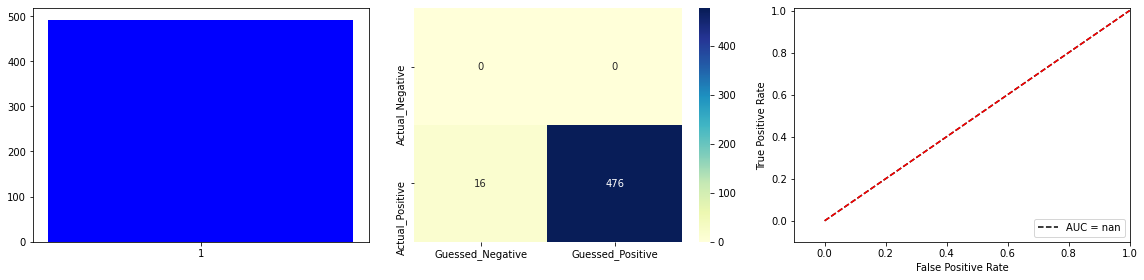

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.97      0.98       492

    accuracy                           0.97       492
   macro avg       0.50      0.48      0.49       492
weighted avg       1.00      0.97      0.98       492



In [347]:
model_performance(pd.Series(y_new_data), pd.Series(predictions))
print(metrics.classification_report(y_new_data,predictions))